p(x) = Cx−α,

There must be some  lowest value xmin at which the power lawisobeyed, an 
  weconsider only the statistics of x above this value
.
Probability of large events  is very small  and  the  probability of  small events  is  high.

The exponent α is often in the range of 2.1 to 4, but is not limited to that range

LOGp(X) = -α*LOGX + LOGa

A straight line on  the log-log  plot indicates a power law distribution with the slope of the line equaling the exponent, 

The mean and the median in power law distributions are very distant from each other (highly skewed), and the  distribution  has  no  maximum  value  (high  kurtosis  value)

Performing statistical inference with normality assumption on data which displays a power law distribution will lead  to  mis-estimation  of  the  effect  since  only  a  subgroup  of  the  data  may conform to the basic assumptions.   Adding to the confusion is the statistical significance which will usually appear despite the problems mentioned because of the large number of observations.:

In [6]:
import urllib
import requests
import matplotlib.pyplot as plt
import pandas as pd
url = "https://www.stat.cmu.edu/~larry/all-of-statistics/=data/fijiquakes.dat"
response = requests.get(url, verify=False)

lists = []
for i in range(len(response.text.split('\n'))):
    list = response.text.split('\n')[i].split(' ')
    list = [ele for ele in list if ele!='']
    lists.append(list)

df = pd.DataFrame(lists[1:-1])
df.columns = lists[0]
df

C:\Users\dskcy\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.stat.cmu.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,Obs.,lat,long,depth,mag,stations
0,1,-20.42,181.62,562,4.8,41
1,2,-20.62,181.03,650,4.2,15
2,3,-26.00,184.10,42,5.4,43
3,4,-17.97,181.66,626,4.1,19
4,5,-20.42,181.96,649,4.0,11
...,...,...,...,...,...,...
995,996,-25.93,179.54,470,4.4,22
996,997,-12.28,167.06,248,4.7,35
997,998,-20.13,184.20,244,4.5,34
998,999,-17.40,187.80,40,4.5,14


In [8]:
import numpy as np
from scipy.stats import kstest

def power_law_mle(data, x_min):
    # Filter data for values >= x_min
    filtered_data = data[data >= x_min]
    n = len(filtered_data)
    
    # MLE for alpha
    alpha = 1 + n / np.sum(np.log(filtered_data / x_min))
    
    return alpha

def ks_statistic(data, x_min, alpha):
    # Filter data for values >= x_min
    filtered_data = data[data >= x_min]
    n = len(filtered_data)
    
    # Empirical CDF
    ecdf = np.arange(1, n+1) / n
    
    # Theoretical CDF
    theoretical_cdf = 1 - (filtered_data / x_min) ** (-alpha + 1)
    
    # KS statistic
    ks_stat = np.max(np.abs(ecdf - theoretical_cdf))
    
    return ks_stat

def calculate_xmin(data):
    # Sort the data in ascending order
    sorted_data = np.sort(data)
    
    # Initialize variables to find the best x_min
    best_x_min = None
    best_alpha = None
    best_ks_stat = np.inf
    
    # Iterate over possible x_min values
    for i in range(len(sorted_data)):
        x_min = sorted_data[i]
        alpha = power_law_mle(sorted_data, x_min)
        ks_stat = ks_statistic(sorted_data, x_min, alpha)
        
        if ks_stat < best_ks_stat:
            best_x_min = x_min
            best_alpha = alpha
            best_ks_stat = ks_stat
    
    return best_x_min, best_alpha

# Example dataset (hypothetical earthquake magnitudes)
data = np.array(df.mag.astype(float))

# Calculate x_min and corresponding alpha
x_min, alpha = calculate_xmin(data)
print(f"Estimated x_min: {x_min}")
print(f"Estimated alpha: {alpha}")


Estimated x_min: 4.4
Estimated alpha: 13.144610740775564


C:\Users\dskcy\AppData\Local\Temp\ipykernel_10524\2057200085.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = 1 + n / np.sum(np.log(filtered_data / x_min))


In [9]:
import numpy as np


# Set x_min (in this case, let's assume 0.6 million is the x_min)
#x_min = 0.6

# Number of data points
n = len(data)

# Calculate the MLE for alpha
alpha_hat = 1 + n / np.sum(np.log(data / x_min))
print(f"Estimated alpha: {alpha_hat}")

Estimated alpha: 23.12106736820502


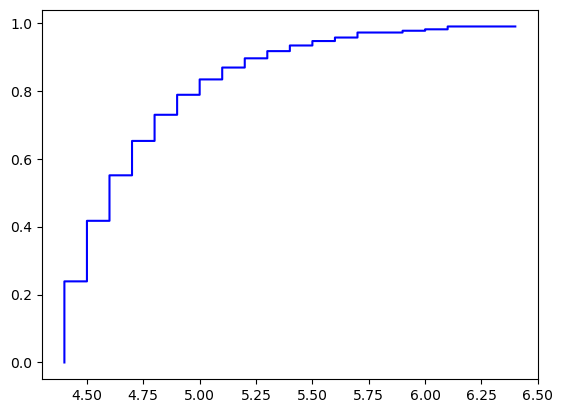

In [21]:
def power_law_cdf(x, x_min, alpha):
    """
    Calculate the cumulative distribution function (CDF) for a power law distribution.

    Parameters:
    x (float or np.array): The value(s) at which to evaluate the CDF.
    x_min (float): The minimum value for the power law behavior.
    alpha (float): The power law exponent.

    Returns:
    float or np.array: The CDF value(s) at x.
    """
    # Ensure x is a numpy array
    x = np.asarray(x)
    
    # Filter values below x_min
    valid_x = np.sort(x[x >= x_min])
    
    cdf = 1 - (valid_x / x_min) ** (1 - alpha)
    return cdf, valid_x

# Example usage

# Calculate the CDF values
cdf_values, xx = power_law_cdf(data, x_min, alpha)


F = pd.DataFrame({
    'x': xx, 
    'F_n': cdf_values, 
  
})

plt.step( 'x', 'F_n', data=F, color='blue')

In [24]:
F_filtered = F[(F.x == 4.9) | (F.x == 4.4)]
F_filtered

,x,F_n
0,4.4,0.000000
1,4.4,0.000000
2,4.4,0.000000
3,4.4,0.000000
4,4.4,0.000000
...,...,...
521,4.9,0.729405
522,4.9,0.729405
523,4.9,0.729405
524,4.9,0.729405


In [3]:
def expected_maximum_value_power_law(x_min, alpha, n):
    # Calculate the expected maximum value
    if alpha <= 1:
        raise ValueError("alpha must be greater than 1")
    
    expected_max = x_min * n**(1 / (alpha - 1))
    return expected_max

In [ ]:
#Rank Frequency plots

# References
1. [Power law](https://public.websites.umich.edu/~mejn/courses/2006/cmplxsys899/powerlaws.pdf)
2. [Power law analysis on Web-based interactions](https://www.researchgate.net/publication/220146916_Statistical_inference_from_power_law_distributed_Web-based_social_interactions)]
3. [Fitting power law distribution with data](https://www.stat.berkeley.edu/~aldous/Research/Ugrad/Willy_Lai.pdf)
4. [Good explanation](https://ml-lab-book.github.io/pages/tutorials/tut_2/files/Power%20law.pdf)
5. [Power Law - Inequality - A good dramatic tale](https://www.theatlantic.com/magazine/archive/2006/09/the-height-of-inequality/305089/)